# 타이타닉 생존자 분석

In [ ]:
# 로지스틱 회귀분석 예제 : # 성별(Sex), 나이(Age), 객실등급 (Pclass), 요금(Fare)이 생존에 어느 정도의 영향을 미쳤는가?

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
# 데이터 파일 로딩(전처리한 데이터셋)
df = pd.read_csv("c:/data/titanic/train3.csv")
df.head()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [3]:
# 생존여부를 기준으로 한 평균값들
df.groupby("Survived").mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


Text(0, 0.5, '빈도')

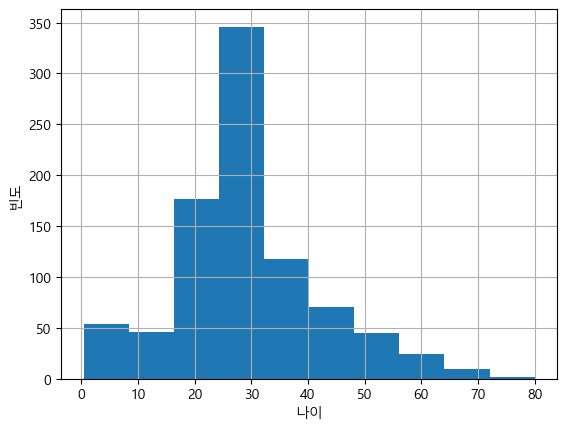

In [4]:
%matplotlib inline
df["Age"].hist()
plt.xlabel('나이')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

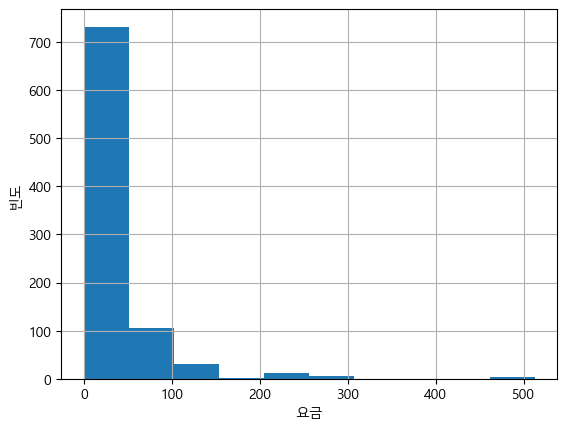

In [5]:
%matplotlib inline
df["Fare"].hist()
plt.xlabel('요금')
plt.ylabel('빈도')

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 사망, 1: 생존)')

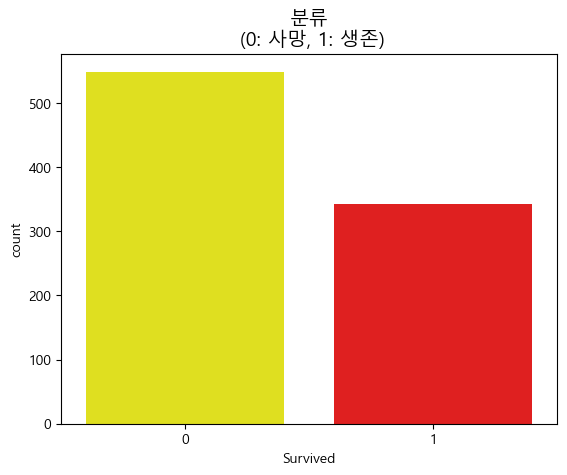

In [6]:
import seaborn as sns

colors = ["yellow", "red"]
sns.countplot('Survived', data=df, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)
# 불균형 데이터셋

In [7]:
train_cols = df.columns[1:]
X = df[train_cols] # 독립변수
y = df["Survived"]
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [8]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2["Survived"].value_counts()

0    342
1    342
Name: Survived, dtype: int64

In [ ]:
# 오버샘플링
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df2 = pd.concat([X_samp,y_samp],axis=1)
df2["Survived"].value_counts()

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


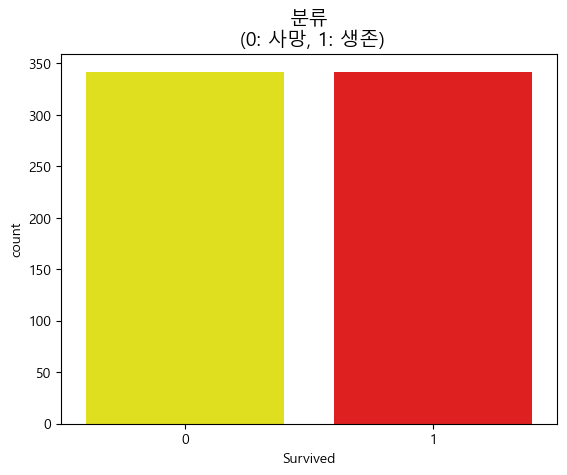

In [9]:
colors = ["yellow", "red"]
sns.countplot('Survived', data=df2, palette=colors)
plt.title('분류\n (0: 사망, 1: 생존)', fontsize=14)
train_cols = df.columns[1:]
X = X_samp[train_cols] # 독립변수
y = y_samp["Survived"]

In [18]:
model = sm.Logit(y,X)
result = model.fit()
print(result.summary2())
# 모델의 설명력 32.7%
# Parch, Fare는 유의하지 않음
# 해석 : coef(회귀계수)를 기준으로 볼 때의 생존 확률
# 좌석등급 : 1등석 > 2등석 > 3등석 순으로 생존률이 높았다.
# 성별 : 여성은 생존 확률이 높았다.
# 1등석 > 2등석 > 성별 > 3등석순으로 생존 여부에 영향을 미쳤음

Optimization terminated successfully.
         Current function value: 0.466486
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              654.1528  
Date:               2023-04-03 12:41 BIC:              690.3765  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           7                LL-Null:          -474.11   
Df Residuals:       676              LLR p-value:      4.2671e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.7178        nan       nan      nan       nan       nan
Pclass2    0.6262        nan       nan      nan       nan

In [ ]:
# # pvalue가 0.05보다 큰 값들을 제거
# train_cols = ['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age', 'SibSp']
# X = df[train_cols] # 독립변수
# y = df["Survived"]

In [ ]:
model = sm.Logit(y,X)
result = model.fit()
print(result.summary())
# 모델의 설명력 32.1%
# 해석 : coef(회귀계수)를 기준으로 볼 때의 생존 확률
# 좌석등급 : 1등석 > 2등석 > 3등석 순으로 생존률이 높았다.
# 성별 : 여성은 생존 확률이 높았다.
# 1등석 > 2등석 > 성별 > 3등석순으로 생존 여부에 영향을 미쳤음

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("학습용:", model.score(X_train, y_train))
print("검증용:", model.score(X_test, y_test))

학습용: 0.7678244972577697
검증용: 0.8029197080291971


In [21]:
# confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix

pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[56, 13],
       [14, 54]], dtype=int64)

In [22]:
df_cm = pd.DataFrame(cm, index=['사망','생존'], columns=['사망', '생존'])
df_cm

,사망,생존
사망,56,13
생존,14,54


c:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
c:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.draw()
c:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.draw()
c:\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'Confusion Matrix'}>

c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


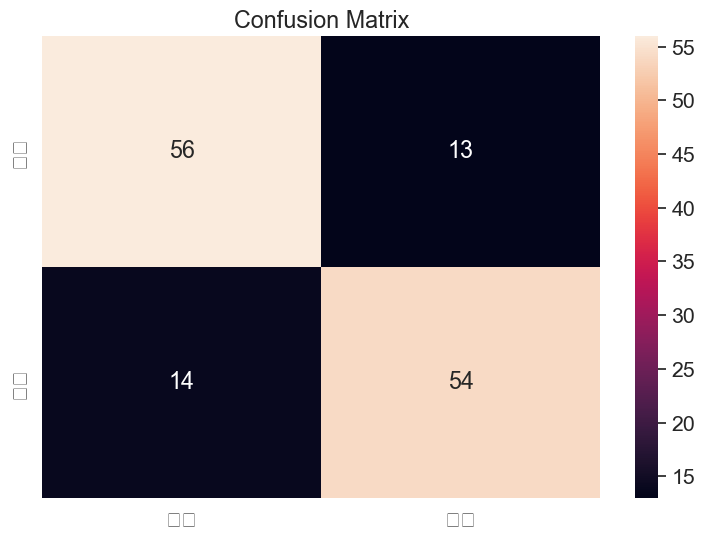

In [23]:
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# 색상이 밝으면 높은 숫자, 색상이 어두우면 낮은 숫자

In [24]:
# 새로운 값 예측
#1등석, 2등석, 3등석, 남성, 여성, 나이, 형제자매, 부모자녀, 요금

#3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
person1 = [[0, 0, 1, 1, 0, 19, 1, 0, 50]]
#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = [[1, 0, 0, 0, 1, 17, 0, 2, 30]]
#2등석, 여성, 40세, 형제자매2, 부모자녀0, 요금20
person3 = [[0, 1, 0, 0, 1, 40, 2, 0, 70]]

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))
print(model.predict_proba(person1))
print(model.predict_proba(person2))
print(model.predict_proba(person3))

[0]
[1]
[1]
[[0.82781325 0.17218675]]
[[0.04440744 0.95559256]]
[[0.21687739 0.78312261]]


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with

In [16]:
import joblib
joblib.dump(model, 'c:/data/titanic/titanic_logit.model')

['c:/data/titanic/titanic_logit.model']

# 타이타닉 모형 불러오기

In [25]:
import joblib
model = joblib.load('c:/data/titanic/titanic_logit.model')

import numpy as np
# 새로운 값 예측
#1등석, 2등석, 3등석, 남성, 여성, 나이, 형제자매, 부모자녀, 요금

#3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
person1 = np.array([0, 0, 1, 1, 0, 19,1,0, 50]).reshape(1,9)
#1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2 = np.array([1, 0, 0, 0, 1, 17, 0,2,30]).reshape(1,9)
#2등석, 여성, 40세, 형제자매2, 부모자녀0, 요금20
person3 = np.array([0, 1, 0, 0, 1, 40,2, 0,70]).reshape(1,9)

print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

rate = model.predict_proba(person1)
print(rate[0][-1])

[0]
[1]
[1]
0.17218674901971576


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
